<a href="https://colab.research.google.com/github/AbhayKhamkar/Data_Analysis/blob/main/Movie_Genre_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project: Movie Genre Prediction

Aim: Predict the genre of a movie based on its plot summary and other features.

Description: Use natural language processing (NLP) techniques for text classification on a movie dataset.

Dataset: IMDb Movie Dataset (https://www.kaggle.com/code/lokkagle/nlp-movie-genre-classification/input)

In [ ]:
# import required library
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import regex as re

In [ ]:
df1 = pd.read_csv('/content/kaggle_movie_train[1].csv')

In [ ]:
df1.head()

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22579 entries, 0 to 22578
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      22579 non-null  int64 
 1   text    22579 non-null  object
 2   genre   22579 non-null  object
dtypes: int64(1), object(2)
memory usage: 529.3+ KB


In [ ]:
df = df1[['text','genre']]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22579 entries, 0 to 22578
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    22579 non-null  object
 1   genre   22579 non-null  object
dtypes: object(2)
memory usage: 352.9+ KB


In [ ]:
def get_null_info(dataframe):
    null_vals = dataframe.isnull().sum()

    df_null_vals = pd.concat({'Null Count': null_vals,
                              'Percent Missing (%)': round(null_vals * 100 / len(dataframe), 2)}, axis = 1)

    return df_null_vals.sort_values(by = ['Null Count'], ascending=False)

In [ ]:
get_null_info(df)

,Null Count,Percent Missing (%)
text,0,0.0
genre,0,0.0


In [ ]:
df['genre'].unique()

array(['thriller', 'comedy', 'drama', 'action', 'sci-fi', 'other',
       'romance', 'horror', 'adventure'], dtype=object)

<Axes: xlabel='genre', ylabel='count'>

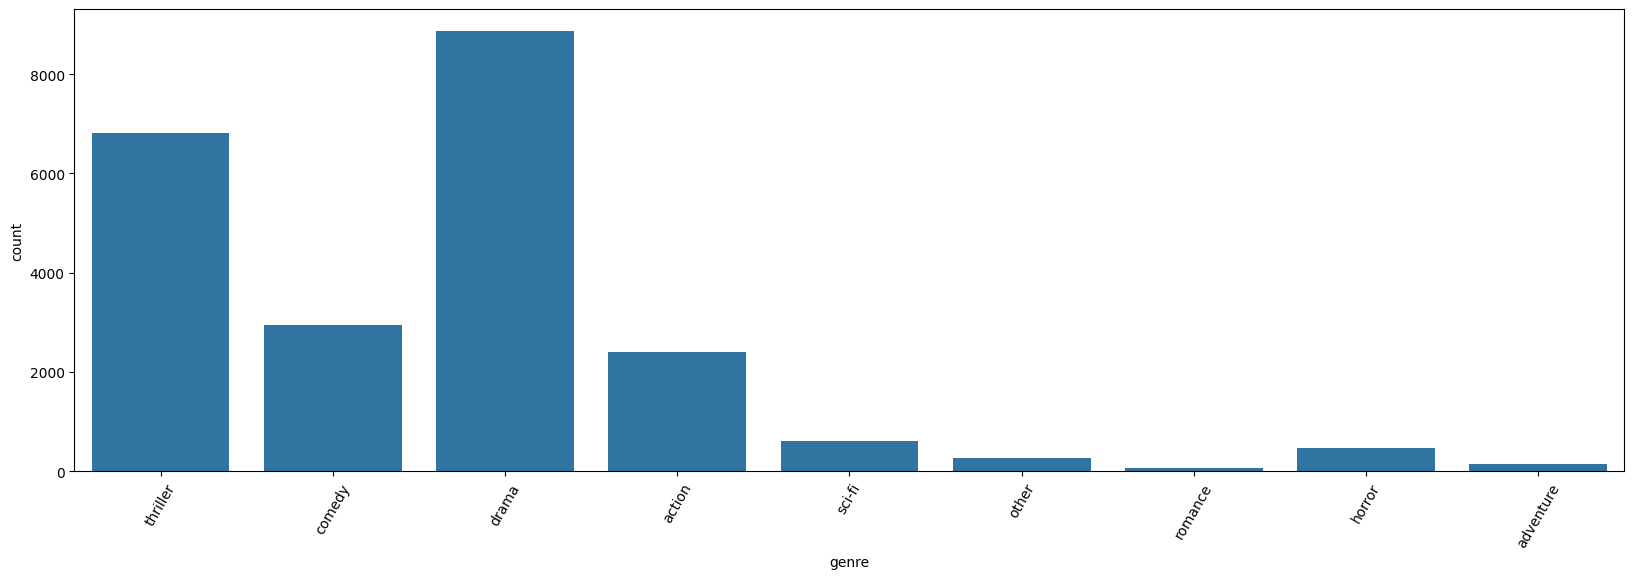

In [ ]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=60)
sns.countplot(x='genre',data=df)

In [ ]:
df['genre'].value_counts()

drama        8873
thriller     6824
comedy       2941
action       2392
sci-fi        613
horror        456
other         270
adventure     147
romance        63
Name: genre, dtype: int64

In [ ]:
df.shape

(22579, 2)

In [ ]:
df.duplicated().sum()

0

In [ ]:
# Preprocess function
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words("english")
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemTitles(title):
    words = nltk.word_tokenize(title)
    words = [re.sub("[^a-zA-Z0-9]","",i).lower().strip() for i in words]
    words = [lemmatizer.lemmatize(i) for i in words if i not in stopwords]
    ps = PorterStemmer()
    words = [ps.stem(word) for word in words]
    title = " ".join(words)
    return title

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Preprocess the movie reviews dataset
nltk.download('wordnet')
nltk.download('punkt')
df['text'] = df['text'].apply(lemTitles)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-15-0362ebb8df32>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text']=df['text'].apply(lemTitles)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22579 entries, 0 to 22578
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    22579 non-null  object
 1   genre   22579 non-null  object
dtypes: object(2)
memory usage: 352.9+ KB


In [ ]:
df.head(10)

,text,genre
0,eadi dead mayb even wish int 2nd floor hall...,thriller
1,summa cum laud launch brand new magazin call...,comedy
2,come surpris take hand lead hallway salvato...,drama
3,ded two detect int jeff apart night medium s...,thriller
4,nd dismount child reach throw arm embrac c...,drama
5,breadth bluff gabe pull ancient binocular sca...,thriller
6,uild man pajama run rain cabbi lose grip bum...,thriller
7,ell rita hayworth disgustingli rich well make...,drama
8,memphi go back garag budgi cackl cut ext ra...,thriller
9,e reel world spin sweat pour pressur build in...,action


In [ ]:
# Feature extraction using CountVectorizer
vectorizer = CountVectorizer(max_features=10000,ngram_range = (1,2))  # You can adjust max_features as needed
X = vectorizer.fit_transform(df['text']).toarray()
y = df['genre'].values

In [ ]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

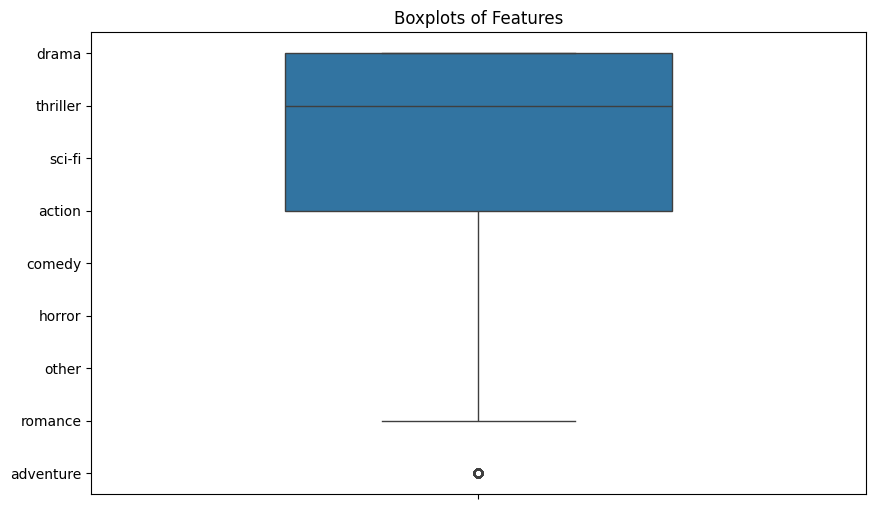

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=y_train, width=0.5)
plt.title('Boxplots of Features')
plt.show()

In [ ]:
# Model training - Multinomial Naive Bayes classifier
MNB = MultinomialNB(alpha=0.1)
MNB.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [ ]:
MNB.score(X_test, y_test)

0.9081045172719221

In [ ]:
# finding best parameters for MultinomialNB classifier
from sklearn.model_selection import GridSearchCV
param={
    'alpha':[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9]
}
grid_MNB = GridSearchCV(MultinomialNB(),param_grid=param, scoring='accuracy', cv=10)

In [ ]:
grid_MNB.fit(X_train, y_train)

In [ ]:
grid_MNB.best_params_

{'alpha': 0.1}

In [ ]:
# Predictions
y_pred = MNB.predict(X_test)
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8921612046058459

Classification Report:
               precision    recall  f1-score   support

      action       0.83      0.95      0.89       473
   adventure       0.92      0.88      0.90        25
      comedy       0.89      0.91      0.90       635
       drama       0.92      0.88      0.90      1728
      horror       0.70      0.93      0.80        84
       other       0.97      0.95      0.96        66
     romance       0.92      0.92      0.92        12
      sci-fi       0.69      0.91      0.78       106
    thriller       0.91      0.88      0.89      1387

    accuracy                           0.89      4516
   macro avg       0.86      0.91      0.88      4516
weighted avg       0.90      0.89      0.89      4516



In [ ]:
# Example prediction
plot_summary_example = "In a post-apocalyptic world overrun by zombies, a small group of survivors bands together to find a rumored safe haven. Along the way, they must navigate treacherous terrain, fend off zombie hordes, and confront the darker side of human nature."
plot_summary_example_tfidf = vectorizer.transform([plot_summary_example])
predicted_genre = MNB.predict(plot_summary_example_tfidf)
print("\nExample Prediction:", predicted_genre[0])


Example Prediction: action


In [ ]:
# Example prediction
plot_summary_example = "A young woman inherits her grandmother's old house and discovers a hidden attic full of mysterious artifacts. As she delves deeper into her family's history, she uncovers dark secrets that have been buried for generations."
plot_summary_example_tfidf = vectorizer.transform([plot_summary_example])
predicted_genre = MNB.predict(plot_summary_example_tfidf)
print("\nExample Prediction:", predicted_genre[0])


Example Prediction: thriller


In [ ]:
# Example prediction
plot_summary_example = "Two star-crossed lovers from rival families defy societal norms and embark on a passionate romance that transcends boundaries. But as their love blossoms, they must navigate the challenges of prejudice, discrimination, and societal expectations."
plot_summary_example_tfidf = vectorizer.transform([plot_summary_example])
predicted_genre = MNB.predict(plot_summary_example_tfidf)
print("\nExample Prediction:", predicted_genre[0])


Example Prediction: drama


In [ ]:
# Model training - Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train)

GaussianNB()

In [ ]:
NB.score(X_test, y_test)

In [ ]:
# Example prediction
plot_summary_example = "In a post-apocalyptic world overrun by zombies, a small group of survivors bands together to find a rumored safe haven. Along the way, they must navigate treacherous terrain, fend off zombie hordes, and confront the darker side of human nature."
plot_summary_example_tfidf = vectorizer.transform([plot_summary_example])
predicted_genre = NB.predict(plot_summary_example_tfidf.toarray())
print("\nExample Prediction:", predicted_genre[0])


Example Prediction: action


In [ ]:
# Example prediction
plot_summary_example = "A young woman inherits her grandmother's old house and discovers a hidden attic full of mysterious artifacts. As she delves deeper into her family's history, she uncovers dark secrets that have been buried for generations."
plot_summary_example_tfidf = vectorizer.transform([plot_summary_example])
predicted_genre = NB.predict(plot_summary_example_tfidf.toarray())
print("\nExample Prediction:", predicted_genre[0])


Example Prediction: other


In [ ]:
# Model training - KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn.score(X_test, y_test)

In [ ]:
# finding best parameters for KNN classifier
from sklearn.model_selection import GridSearchCV
param={
    'n_neighbors':[3,5,7,9]
}
grid_knn = GridSearchCV(KNeighborsClassifier(),param_grid=param, scoring='accuracy', cv=10)

In [ ]:
grid_knn.fit(X_train, y_train)
grid_knn.best_params_

{'n_neighbors': 5}

In [ ]:
# Predictions
y_pred = knn.predict(X_test)
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8024800708591674

Classification Report:
               precision    recall  f1-score   support

      action       0.87      0.76      0.81       473
   adventure       0.78      0.84      0.81        25
      comedy       0.95      0.70      0.80       635
       drama       0.70      0.97      0.81      1728
      horror       0.94      0.54      0.68        84
       other       0.98      0.71      0.82        66
     romance       0.90      0.75      0.82        12
      sci-fi       0.81      0.72      0.76       106
    thriller       0.94      0.68      0.79      1387

    accuracy                           0.80      4516
   macro avg       0.87      0.74      0.79      4516
weighted avg       0.84      0.80      0.80      4516



In [ ]:
# Example prediction
plot_summary_example = "A young woman inherits her grandmother's old house and discovers a hidden attic full of mysterious artifacts. As she delves deeper into her family's history, she uncovers dark secrets that have been buried for generations."
plot_summary_example_tfidf = vectorizer.transform([plot_summary_example])
predicted_genre = knn.predict(plot_summary_example_tfidf)
print("\nExample Prediction:", predicted_genre[0])


Example Prediction: drama


In [ ]:
# Example prediction
plot_summary_example = "In a post-apocalyptic world overrun by zombies, a small group of survivors bands together to find a rumored safe haven. Along the way, they must navigate treacherous terrain, fend off zombie hordes, and confront the darker side of human nature."
plot_summary_example_tfidf = vectorizer.transform([plot_summary_example])
predicted_genre = knn.predict(plot_summary_example_tfidf)
print("\nExample Prediction:", predicted_genre[0])


Example Prediction: drama


In this code:

1.We import necessary libraries including pandas for data manipulation,
  scikit-learn for machine learning algorithms, and TfidfVectorizer for feature extraction.

2.We load the IMDb dataset

3.We preprocess the data by selecting only the 'text' and
  'genre' columns.

4.We split the data into training and testing sets.

5.We use CountVectorizer to convert
 text data into numerical feature vectors.

6.We train a Multiple classifier model /       techniques like Multinomial Naive Bayes, Naive
 Bayes & KNN (KNeighborsClassifier) using the training data.But Multinomial Naive Bayes perform well

7.We use GridSearchCV to get best
  hyperparameters

8.We make predictions on the test data and
 evaluate the model's performance using accuracy and classification report.

9.We provide an example prediction using a sample plot summary.